## Crime Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch

In [2]:
cr = pd.read_csv('crime_data.csv')

In [3]:
cr.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
cr[cr.duplicated()].shape

(0, 5)

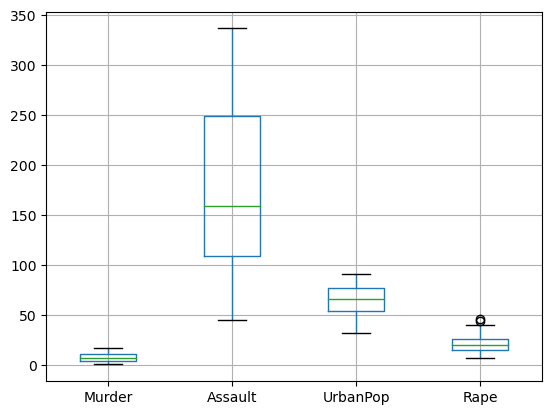

In [6]:
#boxplot
cr.boxplot()
plt.show()

In [7]:
cr.shape

(50, 5)

In [8]:
#normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [9]:
cr_norm = norm_func(cr.iloc[:,1:])
cr_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


### Hierarchical Clustering

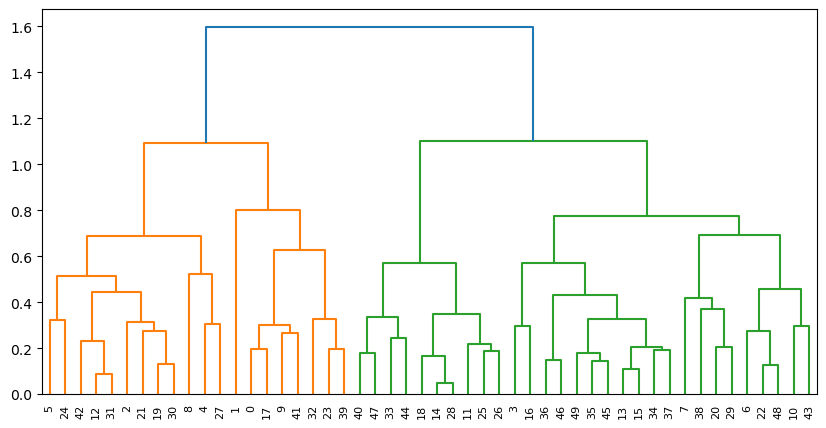

In [23]:
# Create a Dendrogram and here calculating the distance complete
plt.figure(figsize=(10, 5)) 
dendrogram=sch.dendrogram(sch.linkage(cr_norm, method='complete'))
plt.show()

In [24]:
h_cr = cr.copy()
h_cr_norm = cr_norm.copy()

In [25]:
h_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')

In [26]:
y_hc = h_cluster.fit_predict(h_cr_norm)

In [27]:
h_cr_norm['hclusterid'] = y_hc

In [28]:
h_cr_norm.head()

,Murder,Assault,UrbanPop,Rape,hclusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,3


In [29]:
h_cr_norm['hclusterid'].value_counts()

1    20
3    12
2    10
0     8
Name: hclusterid, dtype: int64

In [30]:
h_cr['hclusterid'] = h_cluster.labels_

In [31]:
h_cr.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hclusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [32]:
h_cr_norm.groupby(['hclusterid']).agg(['mean']).reset_index()

,hclusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.800452,0.711473,0.364407,0.445413
1,1,0.296084,0.298973,0.657627,0.279070
2,2,0.143373,0.115411,0.293220,0.111886
3,3,0.607430,0.725742,0.785311,0.644703


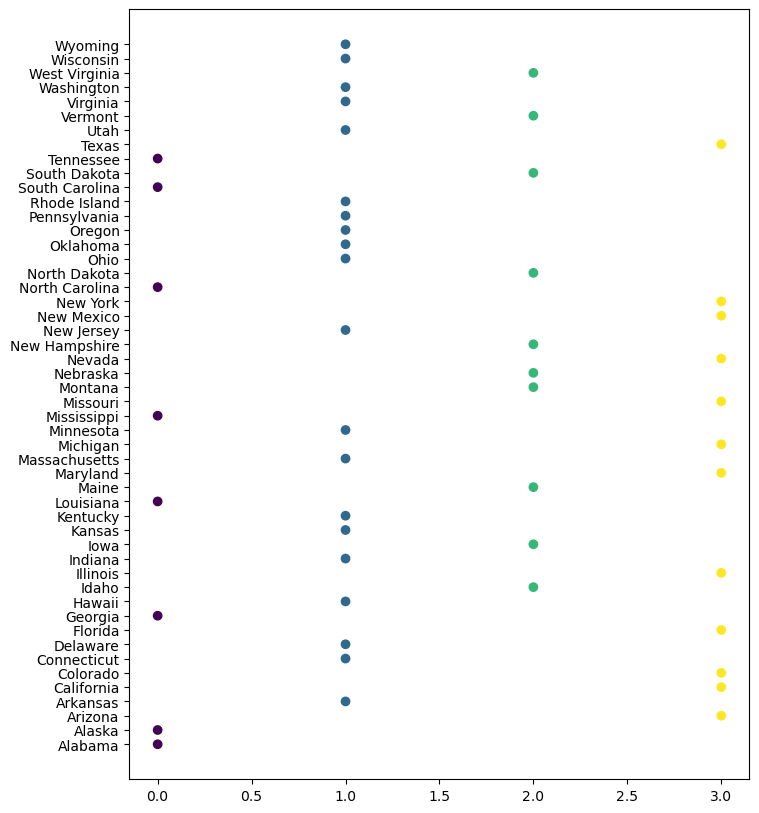

In [33]:
#ploting the clusteres
plt.figure(figsize=(8,10))
plt.scatter(h_cr['hclusterid'],h_cr['Unnamed: 0'], c=h_cluster.labels_)
plt.show()

### K-Means

using elbow method to find the optimum no of clusters.
The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


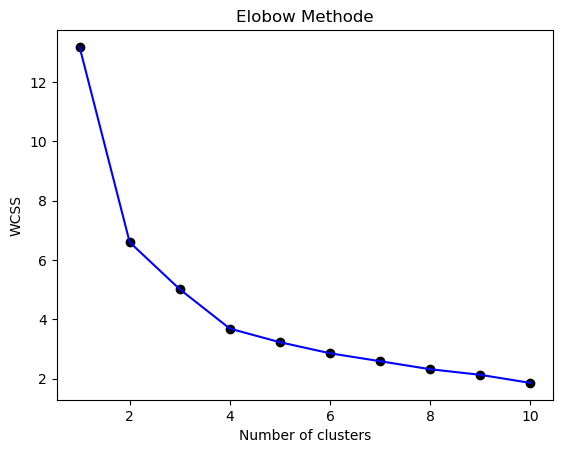

In [34]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(cr_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss, color='blue')
plt.scatter(range(1,11), wcss, color='black')
plt.title('Elobow Methode')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### from Elobow graph, the number of optimum cluster is K=4

In [35]:
K_cr_norm = cr_norm.copy()

In [36]:
K_cr_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [37]:
K_cluster = KMeans(n_clusters=4, random_state=0)
K_cluster.fit(K_cr_norm)

KMeans(n_clusters=4, random_state=0)

In [38]:
K_cluster.labels_

array([2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 1, 3, 2, 3, 0, 1, 0,
       3, 2, 1, 3, 3, 0, 3, 1, 0, 0, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 0, 1,
       3, 1, 1, 3, 3, 1])

In [39]:
K_crime = cr.copy()

In [40]:
K_crime['K_clusterid'] = K_cluster.labels_
K_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,K_clusterid
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [41]:
K_crime.groupby(['K_clusterid'])['Unnamed: 0'].apply(lambda x: tuple(x))

K_clusterid
0    (Alaska, Arizona, California, Colorado, Florid...
1    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
2    (Alabama, Arkansas, Georgia, Louisiana, Missis...
3    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
Name: Unnamed: 0, dtype: object

In [42]:
K_crime['K_clusterid'].value_counts()

1    17
3    13
0    12
2     8
Name: K_clusterid, dtype: int64

In [43]:
# Computing the centroids for K=4 clusters
K_cluster.cluster_centers_

array([[0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868]])

In [44]:
K_crime.groupby(['K_clusterid']).agg('mean').reset_index()

,K_clusterid,Murder,Assault,UrbanPop,Rape
0,0,10.966667,264.000000,76.500000,33.608333
1,1,5.852941,141.176471,73.647059,19.335294
2,2,13.937500,243.625000,53.750000,21.412500
3,3,3.600000,78.538462,52.076923,12.176923


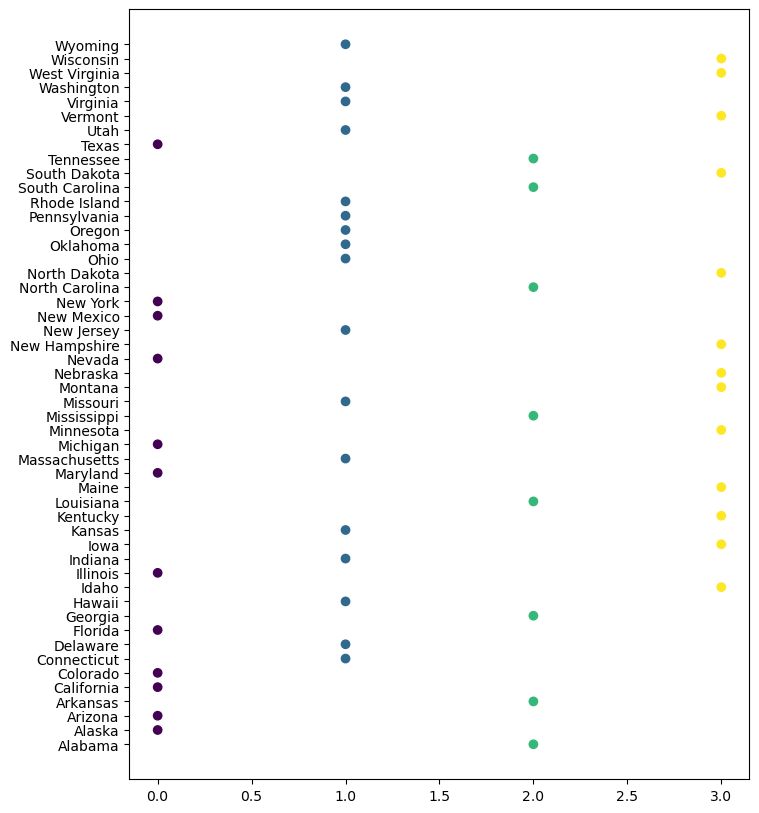

In [45]:
# Plot the clusters
plt.figure(figsize=(8,10))
plt.scatter(K_crime['K_clusterid'],K_crime['Unnamed: 0'], c=K_cluster.labels_)
plt.show()

### DBSCAN 

In [46]:
db_cr = cr.copy()
db_cr_norm = cr_norm.copy()

In [47]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.2, min_samples=3)
dbscan.fit(db_cr_norm)

DBSCAN(eps=0.2, min_samples=3)

In [48]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0,  1, -1,  1,  0, -1, -1,  0,  0, -1,  0, -1,  1, -1, -1,  0,
        0,  0,  2,  0, -1, -1,  0, -1, -1,  2, -1,  0,  2,  0,  0,  0],
      dtype=int64)

In [49]:
db_cr['db_clusterid'] = dbscan.labels_

In [50]:
db_cr.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,db_clusterid
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


In [51]:
db_cr.groupby('db_clusterid').agg(['mean']).reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_120372\2658523053.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  db_cr.groupby('db_clusterid').agg(['mean']).reset_index()


,db_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,9.957692,211.076923,68.615385,24.069231
1,0,4.644444,99.222222,59.000000,14.577778
2,1,11.600000,280.000000,70.333333,31.666667
3,2,4.033333,141.333333,73.333333,26.133333


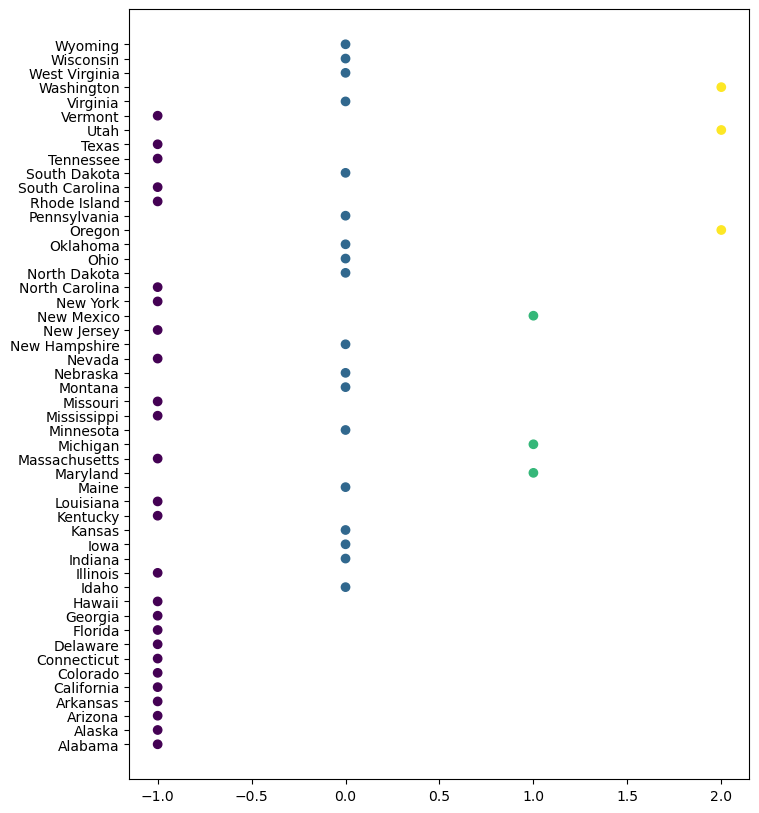

In [52]:
# Plot Clusters
plt.figure(figsize=(8, 10))  
plt.scatter(db_cr['db_clusterid'],db_cr['Unnamed: 0'], c=dbscan.labels_) 
plt.show()

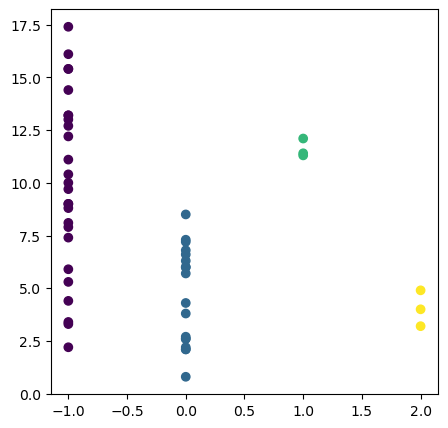

In [53]:
# Plot Clusters
plt.figure(figsize=(5, 5))  
plt.scatter(db_cr['db_clusterid'],db_cr['Murder'], c=dbscan.labels_) 
plt.show()